# Signals and signal processing, I

Lecture 16a - March 14, 2019.

Math 502 - Winter 2019


In [1]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from matplotlib.pyplot import *
from IPython.display import IFrame
from IPython.display import Audio, display

## Summary

- Functions as signals.
- Sampled signals
- Convolution as smoother, noise reduction
- Convolution to highlight noise
- Sampling and aliasing
- Functions of 2 variables -- images
- Sampled images
- Convolution in 2D



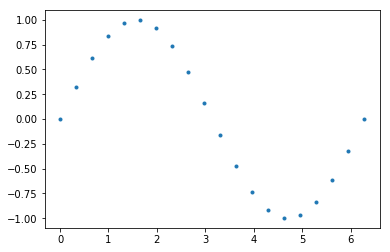

In [2]:
x = linspace(0,2*pi,20)
y = sin(x)
plot(x,y,'.');

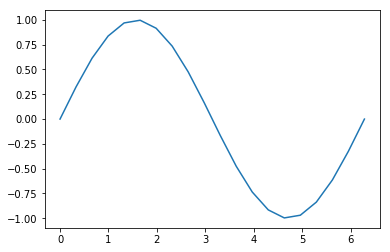

In [3]:
plot(x,y);

In [4]:
y_noisy = y + 0.1*randn(size(y))

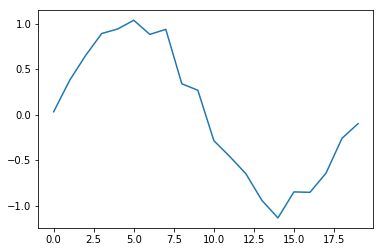

In [6]:
plot(y_noisy,'-');

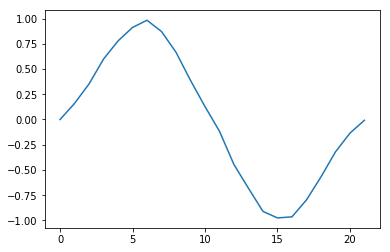

In [7]:
plot(convolve([1/3,1/3,1/3],y_noisy))

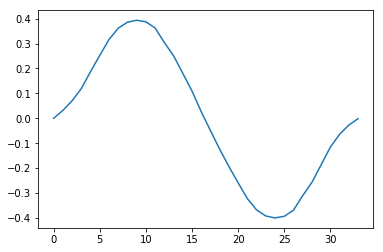

In [8]:
plot(convolve(ones(15)/15,y_noisy));

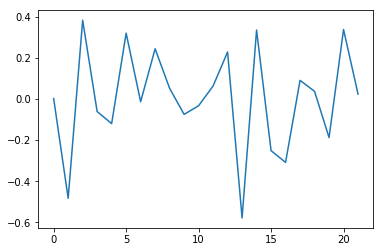

In [9]:
plot(convolve([-1,2,-1],y_noisy));

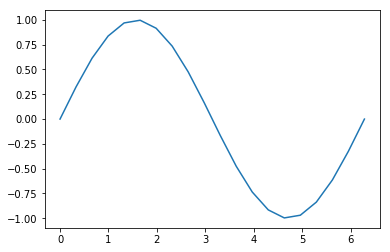

In [15]:
# Aliasing. Try values 1*x to 20*x in the argument of sine. 
plot(x,sin(20*x));

State the Shannon Sampling Theorem.

In [24]:
Fs = 44100
x = linspace(0,3,3*Fs)
freq = 4000
y = sin(2*pi*freq*x**2)
display(Audio(data=y, rate=Fs))

## Images


In [13]:
A = zeros((100,100))

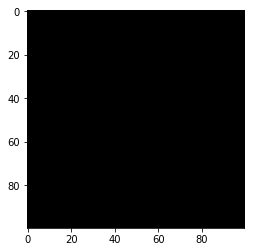

In [14]:
imshow(A, cmap='gray');

In [15]:
for i in range(50):
    for j in range(50):
        A[i,j] = 0.5
        

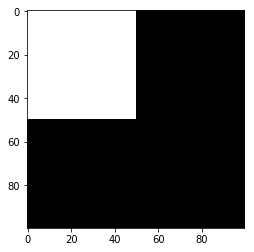

In [17]:
imshow(A, cmap='gray');

In [18]:
for i in range(100):
    for j in range(100):
        if ((i-50)**2 + (j-50)**2 < 400):
            A[i,j] = 1.0

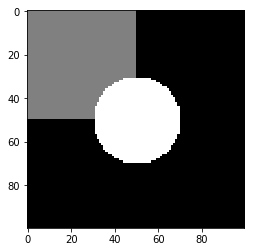

In [19]:
imshow(A, cmap='gray');

SyntaxError: invalid syntax (<ipython-input-51-a2acca675ef9>, line 1)

In [20]:
B = ones((3,3))/9

In [21]:
B

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [23]:
C = signal.convolve2d(B,A)

NameError: name 'signal' is not defined

In [24]:
from scipy.signal import convolve2d

In [25]:
C = convolve2d(B,A)

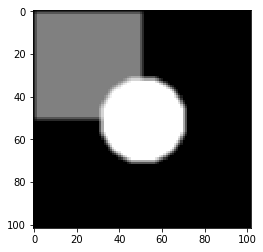

In [26]:
imshow(C, cmap='gray');

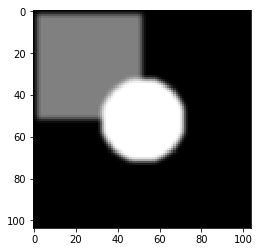

In [27]:
# Again
C = convolve2d(B,C)
imshow(C, cmap='gray');

In [29]:
D = [[0,-.25,0],[-.25,1,-.25],[0,-.25,0]]

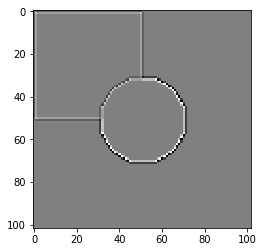

In [30]:
C1 = convolve2d(D,A)
imshow(C1, cmap='gray');

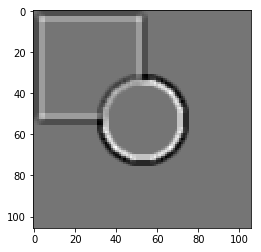

In [31]:
C1 = convolve2d(D,C)
imshow(C1, cmap='gray')

Notes on images [http://www.scipy-lectures.org/advanced/image_processing/]( http://www.scipy-lectures.org/advanced/image_processing/)

In [32]:
from scipy import misc
f = misc.face()

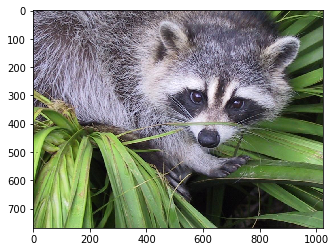

In [34]:
imshow(f);

In [35]:
size(f)

2359296

In [36]:
shape(f)

(768, 1024, 3)

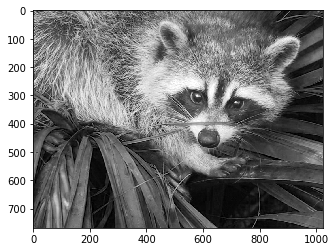

In [37]:
A=f[:,:,2]
imshow(A,cmap='gray');

In [39]:
f = misc.face()
g = f[:,:,:]
g[:,:,1]=zeros((768,1024))
imshow(g);

ValueError: assignment destination is read-only

In [181]:
g[:,:,1]=zeros((768,1024))

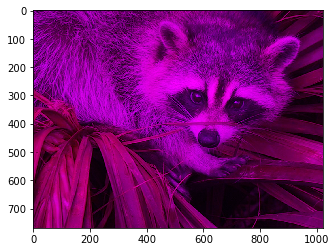

In [182]:
g[:,:,1]=zeros((768,1024))

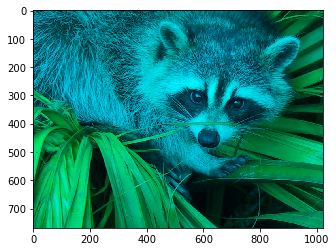

In [190]:
f = misc.face()
r=f[:,:,:]
r[:,:,0]=zeros((768,1024))
imshow(r)

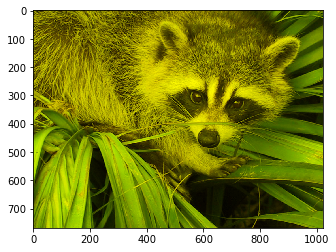

In [191]:
f = misc.face()
b=f
b[:,:,2]=zeros((768,1024))
imshow(b)